## Importing Required Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset 

In [94]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preprocessing

In [95]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
df.drop(['Cabin'],axis=1,inplace=True)

In [99]:
df['Age']=df.Age.fillna(28)

In [100]:
df.drop(['Name'],axis=1,inplace=True)

In [101]:
df['gender']=df.Sex.apply(lambda x: 1 if x=='male' else 0)
df.drop(['Sex'],axis=1,inplace=True)

In [102]:
def embark(x):
    if x=='Q': 
        return 0
    elif x=='C':
        return 1
    else:
        return 2

In [103]:
df.drop(['Ticket'],axis=1,inplace=True)
df['Embarked']=df.Embarked.apply(embark)

In [104]:
df.drop(['PassengerId'],axis=1,inplace=True)

## Visualising Dataset

<Axes: >

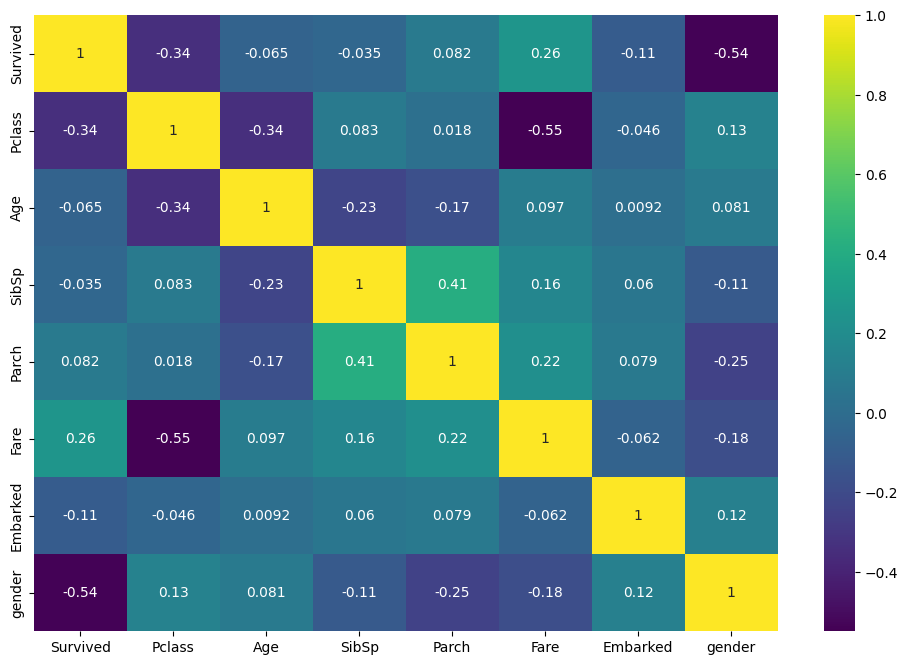

In [105]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [106]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Embarked'}>,
        <Axes: title={'center': 'gender'}>, <Axes: >]], dtype=object)

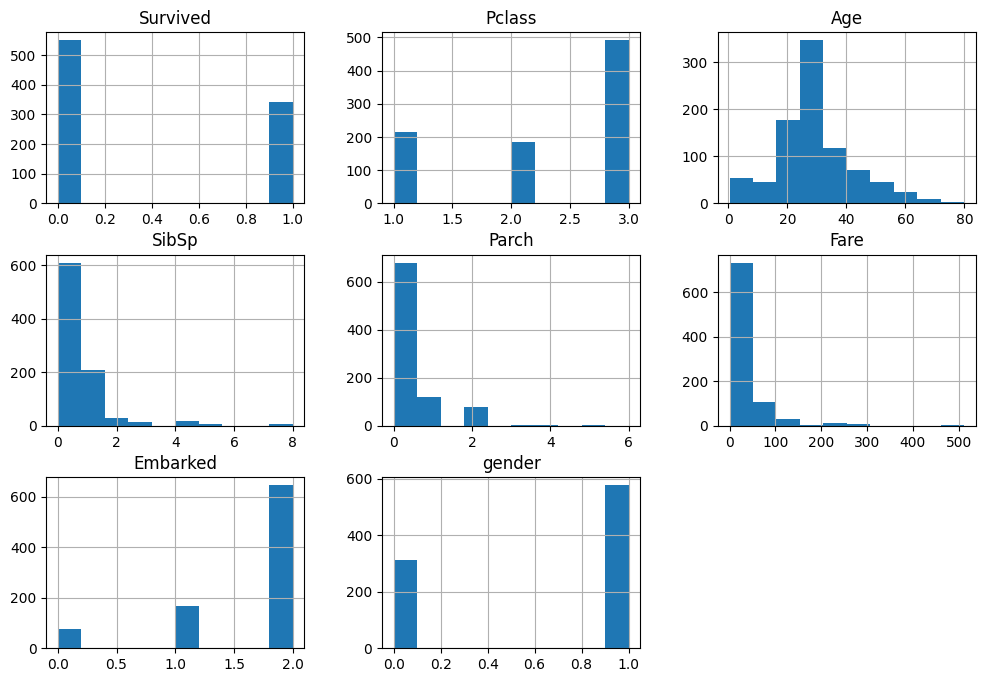

In [107]:
df.hist(figsize=(12,8))

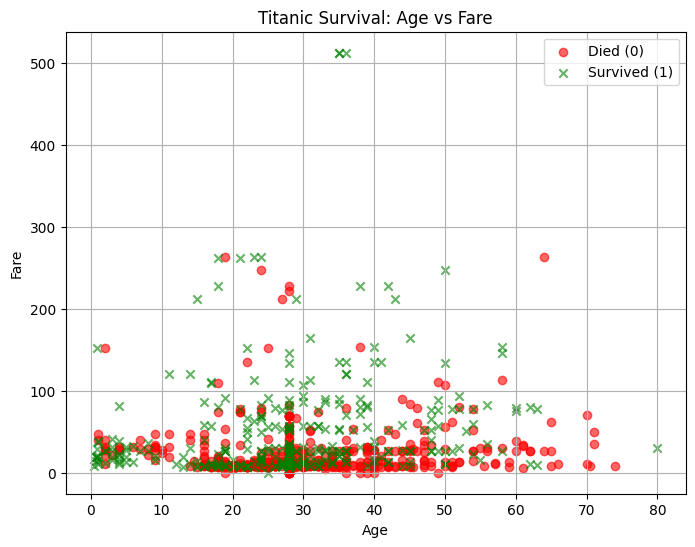

In [117]:
survived = df[df['Survived'] == 1]
died = df[df['Survived'] == 0]

plt.figure(figsize=(8,6))

plt.scatter(died['Age'], died['Fare'], marker='o', color='red', label='Died (0)', alpha=0.6)
plt.scatter(survived['Age'], survived['Fare'], marker='x', color='green', label='Survived (1)', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Titanic Survival: Age vs Fare')
plt.legend()
plt.grid(True)
plt.show()


In [108]:
X=df.drop(['Survived'],axis=1)
y=df.Survived

## Splitting and Scaling data

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  


## Fitting data in Logistic function

In [112]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

## Checking efficiency of model

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



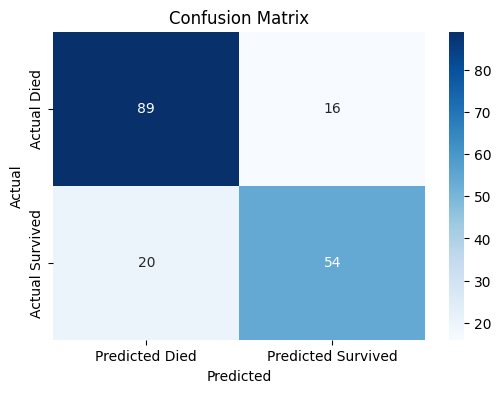

In [114]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Died', 'Predicted Survived'], yticklabels=['Actual Died', 'Actual Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


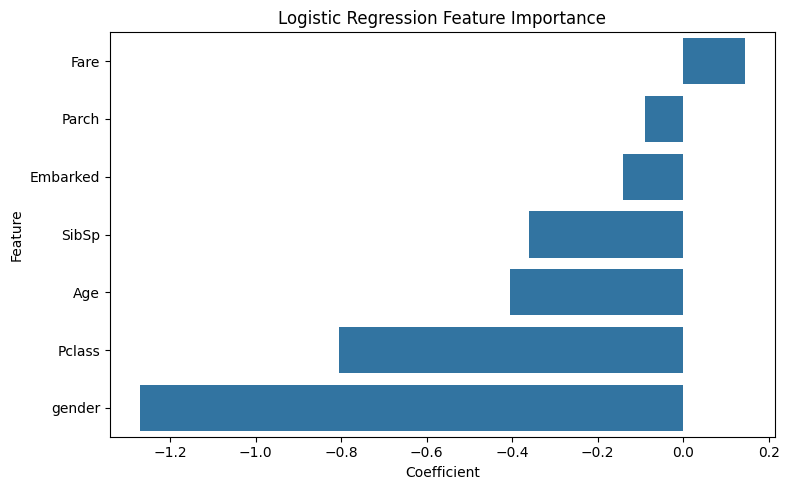

In [116]:
feature_names = X.columns
coefficients = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()


## 🧾 Conclusion

In this project, we developed a logistic regression model to predict passenger survival on the Titanic using the classic Titanic dataset. Key steps included data cleaning, feature engineering (such as encoding categorical variables like `Sex` and `Embarked`), feature scaling, and model training using a standard logistic regression classifier.

- **Data preprocessing** was carefully handled, especially imputing missing values and dropping irrelevant features.
- **Feature scaling** was correctly performed *after* train-test splitting.
- The model achieved an **accuracy of approximately 79.88%**, which is a strong baseline for this task.
- Visualization tools like scatter plots, confusion matrix heatmaps, and feature coefficient plots helped interpret both the data and model performance.
- The **logistic (sigmoid) function** was also plotted to visually understand how logistic regression maps inputs to probabilities.

### 📌 Next Steps:
- Try more complex models like Random Forests, XGBoost, or Neural Networks.
- Perform hyperparameter tuning using cross-validation.
- Explore feature engineering techniques like creating interaction terms or using more advanced imputation.

This notebook serves as a solid foundation for binary classification tasks and demonstrates how logistic regression can be both interpretable and effective.
